<a href="https://colab.research.google.com/github/Veritate1311/Portfolio/blob/Datascience_algo/Llama2_for_MetaData_Generation_Using_FAISS_and_RAGs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import pandas as pd

try:
    df = pd.read_csv('/content/Reviews.csv', engine='python', on_bad_lines='skip')
    print(f"Successfully loaded {len(df)} rows")
except Exception as e:
    print(f"Error: {e}")

Successfully loaded 175266 rows


In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Reviews.csv', engine='python', on_bad_lines='skip')

# Print the column names
print("Column names:")
print(df.columns)

# Print the first few rows
print("\nFirst few rows:")
print(df.head())

# Print data info
print("\nDataFrame info:")
print(df.info())

Column names:
Index([' bit runny',
       ' so keep that in mind when using a spoon to feed.  But since it's so runny',
       ' it's good for younger ones that aren't used to thicker solids.<br /><br />The Spinach',
       ' Peas and Pears from Plum Organics is similar in taste',
       ' but is a little thicker',
       ' if the consistency of this one isn't right for you.  Also',
       ' we often mix this with some rice cereal to thicken it up if needed.<br /><br />I would recommend buying the variety pack to see which ones your kids might like.  Also',
       ' if they don't like it at first', ' don't give up',
       ' give them some time and try it again later.  They might change their minds."'],
      dtype='object')

First few rows:
    bit runny  \
0       44007   
1       44008   
2       44009   
3       44010   
4       44011   

   so keep that in mind when using a spoon to feed.  But since it's so runny  \
0                                         B0031U9VI8             

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [28]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [29]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [30]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [31]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [33]:
import pandas as pd

nRowsRead = 1000
df1 = pd.read_csv('/content/Reviews.csv', delimiter=',', nrows = nRowsRead) # Updated file path
df1.dataframeName = 'Reviews.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


In [34]:
df1.head(5)

,bit runny,so keep that in mind when using a spoon to feed. But since it's so runny,it's good for younger ones that aren't used to thicker solids.<br /><br />The Spinach,Peas and Pears from Plum Organics is similar in taste,but is a little thicker,if the consistency of this one isn't right for you. Also,we often mix this with some rice cereal to thicken it up if needed.<br /><br />I would recommend buying the variety pack to see which ones your kids might like. Also,if they don't like it at first,don't give up,"give them some time and try it again later. They might change their minds."""
0,44007,B0031U9VI8,AOYVC1T2Q1D8D,K. Rasmussen,10,12,4,1298073600,Great baby food - buy somewhere else,Even I think that this baby food tastes good. ...
1,44008,B0031U9VI8,AWCK67D68WNDE,Dawn,7,8,5,1293494400,misleading,I think some of the other reviewers are review...
2,44009,B0031U9VI8,A1L4GUXXSB4T8I,Eric,7,8,4,1290902400,Great product but not at this price.,"This is a great product, my daughter will not ..."
3,44010,B0031U9VI8,A21CXF8WYD0UG8,Valley Girl,4,4,1,1343347200,Outraged!,I bought this and fed this mix to my baby for ...
4,44011,B0031U9VI8,ACD4ORBZEJV6,"Carol ""Edward""",4,4,5,1332806400,"Some mothers might look at this review funny, ...",...I don't have any human children. I purchase...


In [35]:
import pandas as pd

# Read the dataset
nRowsRead = 1000
df1 = pd.read_csv('/content/Reviews.csv', delimiter=',', nrows = nRowsRead)

# Display the current column names
print("Current column names:")
print(df1.columns)

# Replace the incorrect column names with the correct ones
correct_column_names = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
                        'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
df1.columns = correct_column_names

# Display the corrected column names
print("Corrected column names:")
print(df1.columns)

# Verify by displaying the first few rows of the DataFrame
df1.head()


Current column names:
Index([' bit runny',
       ' so keep that in mind when using a spoon to feed.  But since it's so runny',
       ' it's good for younger ones that aren't used to thicker solids.<br /><br />The Spinach',
       ' Peas and Pears from Plum Organics is similar in taste',
       ' but is a little thicker',
       ' if the consistency of this one isn't right for you.  Also',
       ' we often mix this with some rice cereal to thicken it up if needed.<br /><br />I would recommend buying the variety pack to see which ones your kids might like.  Also',
       ' if they don't like it at first', ' don't give up',
       ' give them some time and try it again later.  They might change their minds."'],
      dtype='object')
Corrected column names:
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44007,B0031U9VI8,AOYVC1T2Q1D8D,K. Rasmussen,10,12,4,1298073600,Great baby food - buy somewhere else,Even I think that this baby food tastes good. ...
1,44008,B0031U9VI8,AWCK67D68WNDE,Dawn,7,8,5,1293494400,misleading,I think some of the other reviewers are review...
2,44009,B0031U9VI8,A1L4GUXXSB4T8I,Eric,7,8,4,1290902400,Great product but not at this price.,"This is a great product, my daughter will not ..."
3,44010,B0031U9VI8,A21CXF8WYD0UG8,Valley Girl,4,4,1,1343347200,Outraged!,I bought this and fed this mix to my baby for ...
4,44011,B0031U9VI8,ACD4ORBZEJV6,"Carol ""Edward""",4,4,5,1332806400,"Some mothers might look at this review funny, ...",...I don't have any human children. I purchase...


In [38]:
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)
    return ''

# Apply text preprocessing
df1['cleaned_text'] = df1['Text'].apply(preprocess_text)
df1['cleaned_summary'] = df1['Summary'].apply(preprocess_text)

# Convert 'Time' to datetime
df1['Time'] = pd.to_datetime(df1['Time'], unit='s')

# Filter data (optional, for performance reasons)
df1 = df1.sort_values('Time').tail(100000)  # Last 100,000 reviews

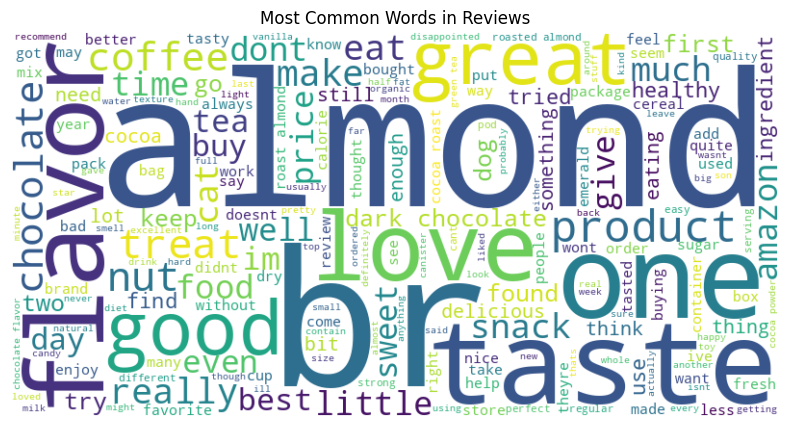

In [40]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def perform_eda(df):
    # Distribution of scores
    fig = px.histogram(df, x='Score', title='Distribution of Review Scores')
    fig.show()

    # Reviews over time
    df_time = df.set_index('Time').resample('M').size().reset_index(name='count')
    fig = px.line(df_time, x='Time', y='count', title='Number of Reviews Over Time')
    fig.show()

    # Word cloud of most common words
    text = ' '.join(df['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) # Now WordCloud is defined
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words in Reviews')
    plt.show()

    # Top products by number of reviews
    top_products = df['ProductId'].value_counts().head(10)
    fig = px.bar(x=top_products.index, y=top_products.values, title='Top 10 Products by Number of Reviews')
    fig.show()

perform_eda(df1)

In [42]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")

def analyze_sentiment(text):
    result = sentiment_analyzer(text[:512])[0]  # Limit text length due to model constraints
    return result['label'], result['score']

# Apply sentiment analysis to a sample of reviews
sample_df = df1.sample(1000) # Use df1 instead of df
sample_df['sentiment'], sample_df['sentiment_score'] = zip(*sample_df['Text'].apply(analyze_sentiment))

# Visualize sentiment distribution
fig = px.pie(sample_df, names='sentiment', title='Sentiment Distribution')
fig.show()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



In [43]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS

def perform_topic_modeling(df, num_topics=5):
    texts = [[word for word in document.split() if word not in STOPWORDS]
             for document in df['cleaned_text']]

    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                         update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

    return lda_model

lda_model = perform_topic_modeling(df)

# Print the top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.031*"nuts" + 0.019*"taste" + 0.018*"good" + 0.015*"br" + 0.013*"great" + 0.013*"flavor" + 0.012*"chocolate" + 0.010*"serving" + 0.010*"snack" + 0.009*"tea"

Topic: 1 
Words: 0.019*"amazon" + 0.018*"product" + 0.017*"price" + 0.012*"great" + 0.009*"dog" + 0.008*"store" + 0.007*"time" + 0.007*"treat" + 0.006*"ordered" + 0.006*"come"

Topic: 2 
Words: 0.017*"treats" + 0.015*"br" + 0.014*"like" + 0.013*"cat" + 0.012*"cats" + 0.011*"love" + 0.011*"eat" + 0.011*"food" + 0.008*"sugar" + 0.008*"time"

Topic: 3 
Words: 0.023*"like" + 0.015*"coffee" + 0.015*"flavor" + 0.014*"taste" + 0.012*"good" + 0.009*"im" + 0.008*"buy" + 0.008*"tried" + 0.007*"order" + 0.007*"different"

Topic: 4 
Words: 0.076*"almonds" + 0.059*"chocolate" + 0.043*"cocoa" + 0.029*"br" + 0.017*"dark" + 0.016*"almond" + 0.014*"roasted" + 0.013*"emerald" + 0.013*"snack" + 0.011*"taste"



In [46]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments

# Load model directly
tokenizer = AutoTokenizer.from_pretrained("decapoda-research/llama-7b-hf")
model = AutoModelForCausalLM.from_pretrained("decapoda-research/llama-7b-hf")

# Prepare dataset for fine-tuning
def prepare_data_for_finetuning(df):
    prompts = df['ProductId'] + " " + df['ProductName']
    responses = df['Text']
    dataset = [{"prompt": p, "response": r} for p, r in zip(prompts, responses)]
    return dataset

train_dataset = prepare_data_for_finetuning(df)

# Convert dataset to a format suitable for the Trainer
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['prompt'], examples['response'], truncation=True, padding='max_length')

tokenized_datasets = CustomDataset(tokenize_function(train_dataset))

# Fine-tuning configuration
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Fine-tune the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)

trainer.train()


OSError: decapoda-research/llama-7b-hf is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
import faiss
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
sentence_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Create embeddings
embeddings = sentence_model.encode(df['cleaned_text'].tolist(), show_progress_bar=True)

# Create FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings.astype('float32'))

def search_similar_reviews(query, k=5):
    query_vector = sentence_model.encode([query])
    distances, indices = index.search(query_vector.astype('float32'), k)
    return df.iloc[indices[0]]

In [ ]:
def retrieve_and_generate(query, k=5):
    similar_reviews = search_similar_reviews(query, k)

    context = " ".join(similar_reviews['Text'].tolist())
    prompt = f"Context: {context}\n\nQuery: {query}\n\nGenerated review:"

    inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(**inputs, max_length=200, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return response

In [ ]:
import streamlit as st

def main():
    st.title("Amazon Fine Food Reviews Analysis and Generation")

    # Sidebar for navigation
    page = st.sidebar.selectbox("Choose a page", ["EDA", "Sentiment Analysis", "Topic Modeling", "Review Generation"])

    if page == "EDA":
        st.header("Exploratory Data Analysis")
        perform_eda(df)

    elif page == "Sentiment Analysis":
        st.header("Sentiment Analysis")
        text = st.text_area("Enter a review to analyze:")
        if st.button("Analyze Sentiment"):
            sentiment, score = analyze_sentiment(text)
            st.write(f"Sentiment: {sentiment}")
            st.write(f"Confidence: {score:.2f}")

    elif page == "Topic Modeling":
        st.header("Topic Modeling")
        num_topics = st.slider("Number of topics", 2, 10, 5)
        if st.button("Perform Topic Modeling"):
            lda_model = perform_topic_modeling(df, num_topics)
            for idx, topic in lda_model.print_topics(-1):
                st.write(f'Topic: {idx}')
                st.write(f'Words: {topic}')
                st.write("---")

    elif page == "Review Generation":
        st.header("Review Generation")
        product = st.text_input("Enter a product name or ID:")
        if st.button("Generate Review"):
            generated_review = retrieve_and_generate(product)
            st.write("Generated Review:")
            st.write(generated_review)

if __name__ == "__main__":
    main()

In [ ]:
!pip install pyngrok
from pyngrok import ngrok

!streamlit run app.py &>/dev/null&
url = ngrok.connect(port='8501')
print(f"Streamlit app URL: {url}")